In [1]:
#필요한 라이브러리 호출
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

In [2]:
# 엑셀 파일 불러오기
# 채원이가 고친 마지막 파이널데이터로 함
filename = 'master_data_final.xlsx'
data = pd.read_excel(filename)

In [3]:
# 데이터 쭉 보고 싶으면 호출
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

## Feature engineering

In [ ]:
# 펀딩시작요일- LabelEncoder으로 숫자 타입으로 변환
#from sklearn.preprocessing import LabelEncoder
#le= LabelEncoder()
#data.펀딩시작요일= le.fit_transform(data.펀딩시작요일)
#le.classes_
#0:Fri
#1:Mon
#2:Sat
#3:Sun
#4:Thu
#5:Tue
#6:Wed

In [ ]:
# 카테고리- LabelEncoder으로 숫자 타입으로 변환
#from sklearn.preprocessing import LabelEncoder
#le= LabelEncoder()
#data.카테고리= le.fit_transform(data.카테고리)
#le.classes_
#0:디자인소품
#1:반려동물
#2:뷰티
#3:스포츠·모빌리티
#4:여행·레저
#5:테크·가전
#6:패션·잡화
#7:푸드
#8:홈리빙

In [ ]:
#데이터타입 카테고리로 바꾸기
#categorical_feature_names= ['앵콜펀딩여부','리워드종류수','카테고리','펀딩시작요일']
#for var in categorical_feature_names:
#    data[var] = data[var].astype("category")

In [4]:
# 펀딩시작요일 원핫인코딩
# 라벨인코딩후 카테고리타입으로 변환하나 원핫인코딩하나 별반 차이 없어서 원핫인코딩으로감
data = pd.concat([data,pd.get_dummies(data['펀딩시작요일'])],axis=1)

In [ ]:
plt.scatter(data.과거성공프로젝트수/data.과거프로젝트수, data.달성률)

In [ ]:
#data['성공비율'] = data.과거성공프로젝트수/data.과거프로젝트수
#data['성공비율']

In [ ]:
# 성공비율 잘안나옴 ㅠ
# 다른 방법있으면 적용해봐도 될듯
#data['과거프로젝트수'] = data.과거프로젝트수 + 1
#data = data[(data.과거성공프로젝트수/data.과거프로젝트수)<=1]  

#plt.scatter(data.과거성공프로젝트수/data.과거프로젝트수, data.달성률)
#data['성공비율'] = data.과거성공프로젝트수/data.과거프로젝트수

In [5]:
# 펀딩기간 형성 및 정수로 변환

data['펀딩기간'] = (data['펀딩마감날짜'] - data['펀딩시작날짜'])
data['펀딩기간'] = data.펀딩기간.dt.days

# 사용한 날짜 변수 다시 제거

#data = data.drop(columns = ['펀딩시작날짜','펀딩마감날짜'])
# 펀딩기간 0인거 제거

data = data[data['펀딩기간']!=0]

# 일단 하면 성능좋아져서 했음


In [6]:
# 일펀딩금액과 일글수 파생변수 생성

data['일펀딩금액'] = data.목표금액/data.펀딩기간
data['일글수'] = data.글업데이트수/data.펀딩기간

In [ ]:
# 일평균 글업데이트수와 중복되는 컬럼이기 때문에 제거 or 지켜보자
#['글업데이트수','과거성공프로젝트수','목표금액'])

In [7]:
# 파생변수

data['문장당강조'] = data.Strong/data.문장수
data['문장당밑줄']= data.Under/data.문장수

In [ ]:
# 파생변수
#= (data.목표금액/data.리워드종류수)

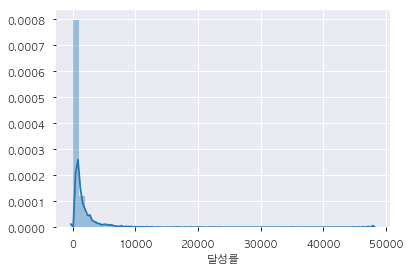

In [9]:
rc('font', family='AppleGothic')
sns.distplot(data["달성률"])

In [10]:
# log transformation
data["log_count"] = np.log(data["달성률"] + 1)

print(data.shape)
data[["달성률", "log_count"]].head()

(5282, 70)


,달성률,log_count
0,2116,7.657755
1,151,5.023881
2,2588,7.859027
3,4565,8.426393
4,21,3.091042


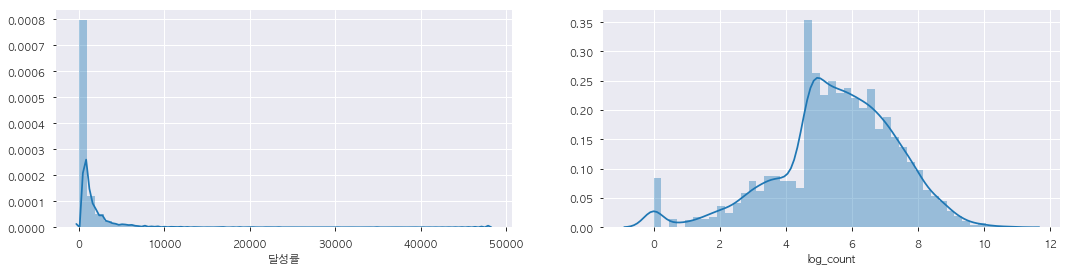

In [11]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.distplot(data["달성률"], ax=ax1)

sns.distplot(data["log_count"], ax=ax2)

In [12]:
# log transformation한 달성률 다시 exp로 원상복귀 하기위한 참고
data["달성률(recover)"] = np.exp(data["log_count"]) - 1

print(data.shape)

data[["달성률", "log_count", "달성률(recover)"]].head()

(5282, 71)


,달성률,log_count,달성률(recover)
0,2116,7.657755,2116.0
1,151,5.023881,151.0
2,2588,7.859027,2588.0
3,4565,8.426393,4565.0
4,21,3.091042,21.0


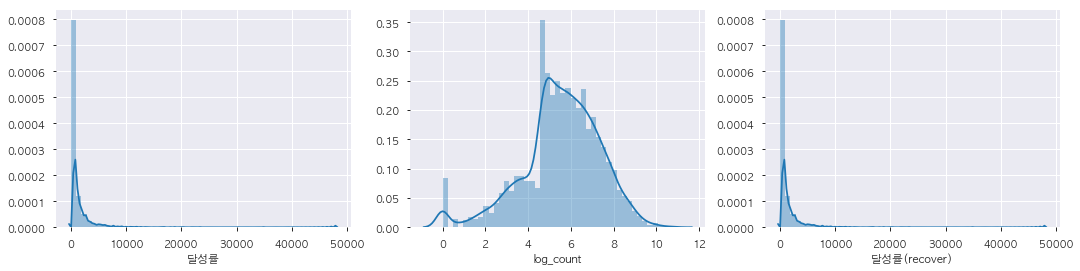

In [13]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(18, 4)
sns.distplot(data["달성률"], ax=ax1)

sns.distplot(data["log_count"], ax=ax2)

sns.distplot(data["달성률(recover)"], ax=ax3)

In [14]:
data.columns

Index(['Unnamed: 0', 'url', '메이커', '펀딩시작날짜', '펀딩마감날짜', '펀딩시작요일', '목표금액',
       '서포터수', '좋아요수', '글업데이트수', '댓글수', '리워드종류수', '이미지수', '비디오수', '배송시작날짜',
       '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수',
       '앵콜펀딩여부', '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2',
       '제목단어수', '펀딩성공여부', '달성률', '펀딩시작월', '소비자물가', '근원물가', '생활물가', '실질GDP성장률',
       '제목', '달성액', '요약글', '카테고리', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', '분기', '와디즈기사개수', '크라우드펀딩기사개수', 'PER',
       'PBR', 'ROE', 'EBIT', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       '펀딩기간', '일펀딩금액', '일글수', '문장당강조', '문장당밑줄', 'log_count', '달성률(recover)'],
      dtype='object')

In [15]:
data.head(1)

,Unnamed: 0,url,메이커,펀딩시작날짜,펀딩마감날짜,펀딩시작요일,목표금액,서포터수,좋아요수,글업데이트수,댓글수,리워드종류수,이미지수,비디오수,배송시작날짜,마감배송차이,인스타존재여부,인스타팔로워수,와디즈팔로워수,과거프로젝트수,과거성공프로젝트수,앵콜펀딩여부,음절수,단어수,문장수,Strong,Under,가독성,가독성2,제목단어수,펀딩성공여부,달성률,펀딩시작월,소비자물가,근원물가,생활물가,실질GDP성장률,제목,달성액,요약글,카테고리,디자인소품,반려동물,뷰티,스포츠·모빌리티,여행·레저,테크·가전,패션·잡화,푸드,홈리빙,분기,와디즈기사개수,크라우드펀딩기사개수,PER,PBR,ROE,EBIT,Fri,Mon,Sat,Sun,Thu,Tue,Wed,펀딩기간,일펀딩금액,일글수,문장당강조,문장당밑줄,log_count,달성률(recover)
0,0,https://www.wadiz.kr/web/campaign/detail/17233,건강한연구소,2018-06-27,2018-08-01,Wed,1000000,318,193,6,73,6,16,0,2018-09-03,33,1,1826,5,5,5,0,2557,1430,88,26,30,39.066984,11.84722,9,1,2116,2018-06,1.5,1.2,1.5,2.9,[3+1추가할인] 하루에 양배추 한 통씩 먹자!! 국내 최대 함량 : ),21164500,"'어떻게하면 양배추를 최대한 많이,쉽게 섭취할 수 있을까??' 라는 생각에서 출발!...",푸드,0,0,0,0,0,0,0,1,0,18Q1적용,30,269,23.014,1.318333,9.276333,116.833333,0,0,0,0,0,0,1,35,28571.428571,0.171429,0.295455,0.340909,7.657755,2116.0


## Feature Selection

In [16]:
# 필요한 컬럼만 추출
#좋아요/서포터/글업데이트/댓글수x
#와디즈,크라우드펀딩기사개수/경제지표x
#인스타존재여부/인스타팔로워수x
feature_names=['log_count', #정답값
               '좋아요수',
               '목표금액', 
               '리워드종류수',
               '이미지수',
               '비디오수',
               '마감배송차이',
               '와디즈팔로워수',
               '과거프로젝트수',
               '과거성공프로젝트수',
               '앵콜펀딩여부',
               '음절수',
               '단어수',
               '문장수',
               'Strong',
               'Under',
               '가독성',
               '가독성2', 
               '제목단어수', 
               '펀딩성공여부',
               #'카테고리',
               '디자인소품',
               '반려동물',
               '뷰티',
               '스포츠·모빌리티',
              '여행·레저',
               '테크·가전',
               '패션·잡화',
               '푸드', 
               '홈리빙',
               'Fri',
               'Mon',
               'Sat',
               'Sun',
               'Thu',
               'Tue',
               'Wed',
               #'성공비율',
               '펀딩기간',
               '일펀딩금액',
               '일글수',
              '문장당강조',
               '문장당밑줄']
total = data[feature_names]

학습용 데이터 준비

In [19]:
X = total.drop(columns=['log_count'])
y = total.log_count

# 학습용/테스트용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Model Selection and evaluation

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000)

rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

y_pred = rf.predict(X_test)

import sklearn.metrics as mt

#평가 지표 값들을 계산한다.
mse = mt.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = mt.r2_score(y_test, y_pred)

print("MSE:{:.3f}\nRMSE: {:.3f}\nR2: {:.3f}".format(mse,rmse,r2))
#print(mt.accuracy_score( y_pred, y_test))
#print(mt.confusion_matrix(y_pred, y_test))

pd.DataFrame({'속성명':X.columns, '중요도':rf.feature_importances_}).sort_values('중요도',ascending=False)

0.9803398092897182
0.8602245003879445
MSE:0.448
RMSE: 0.669
R2: 0.860


,속성명,중요도
18,펀딩성공여부,0.558997
0,좋아요수,0.245778
1,목표금액,0.054271
37,일글수,0.013390
36,일펀딩금액,0.010034
3,이미지수,0.009312
35,펀딩기간,0.008492
16,가독성2,0.007896
5,마감배송차이,0.007047
38,문장당강조,0.006884


In [ ]:
# 로그로 학습한 값을 다시 exp로 원상복귀한뒤 성능 측정을 하면 설명력이 떨어질까?

# log transformation한 달성률(log_count)을 예측
y_pred = rf.predict(X_test)
# log transformation한 달성률(log_count)을 다시 exp로 원상복귀
predictions = np.exp(y_pred) - 1